In [2]:
library('dclone')
library('rjags')
library('snow')

# prepare data

# biz <- c(30, 0, 0, 50, 0, 20, 0, 0, 120, 0, 0, 0, 80, 0)
biz <- c(rep(0,11),
         14,
         0, 0,
         34.5,
         5,
         25,
         225,
         0,0, 0,0,
         90,
         68.5,
         0,
         50,
         0,0,
         241,
         0, 50,0,0,0,0)


# model

m <- NA

chains <- 4
nodes <- 4

runbiz <- function (biz,
                    chains = 4,
                    nodes = 4) {
        
        biz2 <- biz[biz>0]
        zero <- length(biz) - length(biz2)
        
        m <- NA
        
        system.time (m <- jags.parfit(cl = nodes,
                                      model = 'biz2.bug',
                                      data = list('biz2' = biz2, 'zero' = zero),
                                      n.chains = chains,
                                      n.adapt = 1000,
                                      params = c('p', 'm'),
                                      n.iter = 20000))
        m
}


runmul <- function (b = biz, steps = 3, do.plot = FALSE) {
        
        N = length(b)
        
        models <- list()
    
        for (i in 1:(steps)) {
                deb <- round(N*(i-1)/(steps+1)+1)
                fin <- round(N*(i+1)/(steps+1))
                m <- runbiz(b[deb:fin])
                print (summary(m))
                if (do.plot) plot(m)
                models[[i]] <- m
        }
    
        models
}

Loading required package: coda
Loading required package: parallel
dclone 2.0-0 	 2013-09-27
Linked to JAGS 3.4.0
Loaded modules: basemod,bugs

Attaching package: ‘snow’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, clusterSplit, makeCluster, parApply,
    parCapply, parLapply, parRapply, parSapply, splitIndices,
    stopCluster




Parallel computation in progress


Iterations = 2001:22000
Thinning interval = 1 
Number of chains = 4 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean       SD  Naive SE Time-series SE
m 18.18 17.04913 0.0602778      0.0617671
p  0.70  0.09981 0.0003529      0.0003515

2. Quantiles for each variable:

    2.5%    25%     50%     75%   97.5%
m 2.5371 8.4041 13.9917 22.7575 58.5178
p 0.4896 0.6351  0.7073  0.7726  0.8737


Parallel computation in progress


Iterations = 2001:22000
Thinning interval = 1 
Number of chains = 4 
Sample size per chain = 20000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
m 30.3167 16.5782 0.0586127      0.0607419
p  0.5266  0.1115 0.0003941      0.0003941

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5%
m 9.047 19.0457 26.9087 37.6009 71.4418
p 0.309 

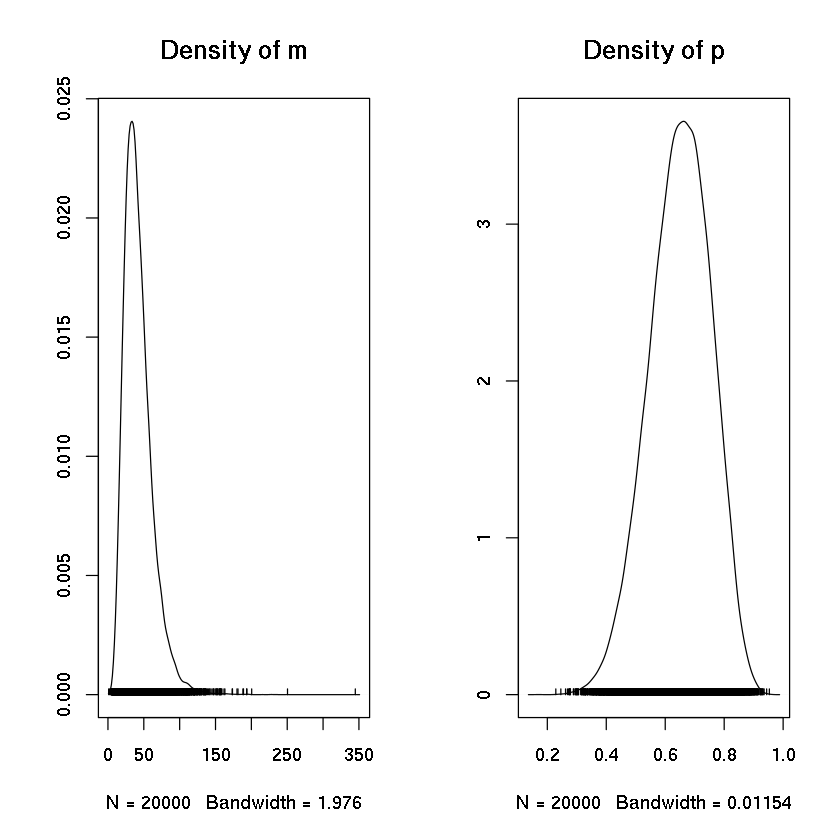

In [3]:
mul <- runmul()

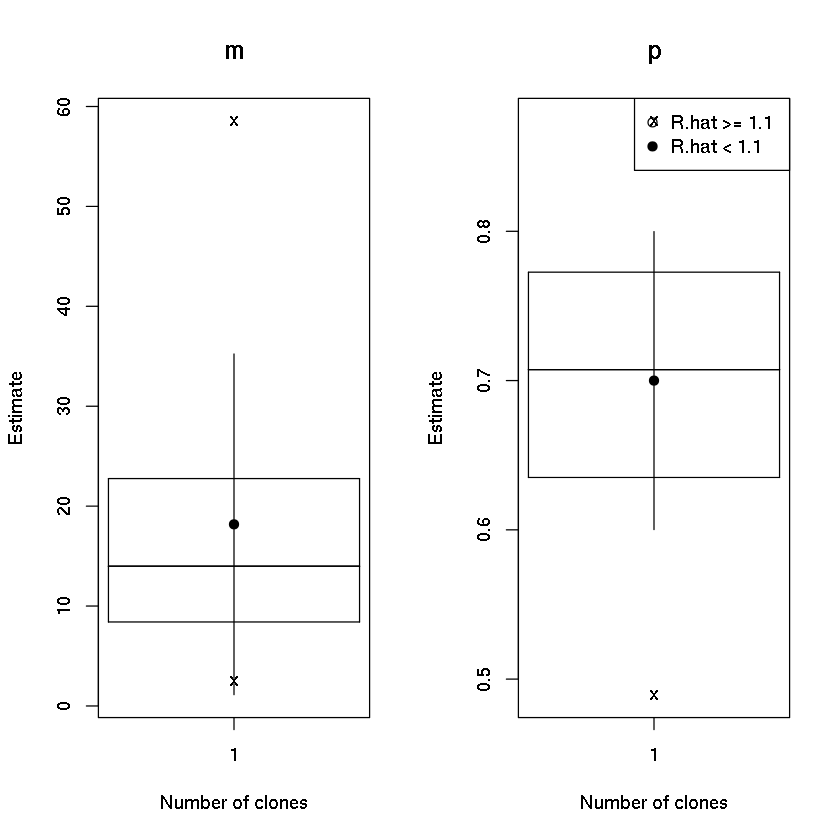

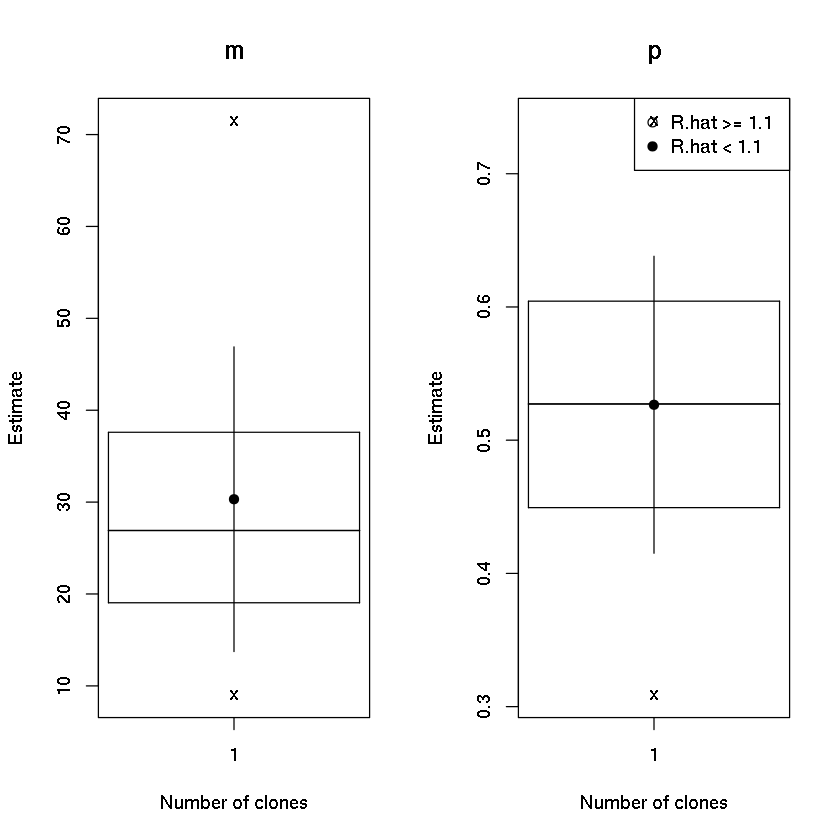

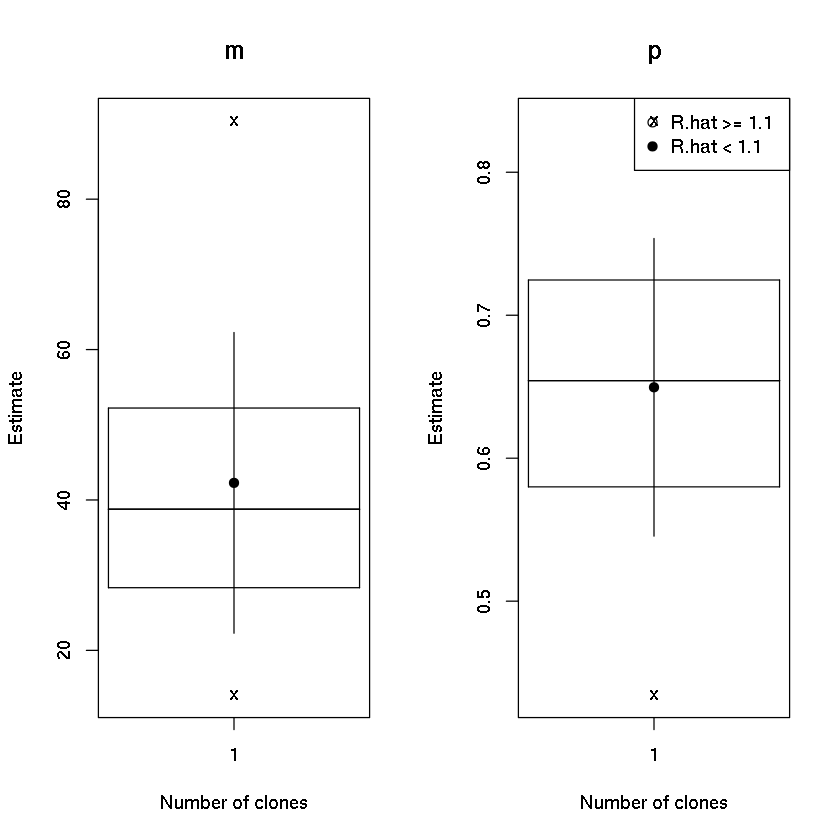

In [9]:
for (i in 1:length(mul)) {
    foo <-dctable(mul[[i]])
    plot(foo)
}